In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('chatgpt_tweets.csv')

In [4]:
df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1.64E+18,2023-04-03 13:59:44+00:00,07:02.5,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0
1,1.64E+18,2023-04-03 10:59:22+00:00,06:59.4,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0
2,1.64E+18,2023-04-03 03:59:28+00:00,06:52.5,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0
3,1.64E+18,2023-04-03 15:59:59+00:00,07:04.7,Get an intelligent chatbot for your website in...,en,1.63304E+18,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0
4,1.64E+18,2023-04-03 01:59:25+00:00,06:50.6,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1.3114E+18,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0


In [5]:
df.shape

(33002, 20)

In [6]:
df.columns

Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_name', 'user_username', 'user_location',
       'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified', 'source',
       'retweet_count', 'like_count', 'reply_count', 'impression_count'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

tweet_id                    0
tweet_created               0
tweet_extracted             0
text                        0
lang                        0
user_id                     0
user_name                   3
user_username               0
user_location           13402
user_description         5108
user_created                4
user_followers_count        6
user_following_count        6
user_tweet_count            6
user_verified               6
source                  33002
retweet_count               6
like_count                  6
reply_count                 6
impression_count            6
dtype: int64

In [9]:
df = df.drop(['user_location', 'user_description', 'source'], axis = 1)#only tweet content is important

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

tweet_id                0
tweet_created           0
tweet_extracted         0
text                    0
lang                    0
user_id                 0
user_name               0
user_username           0
user_created            0
user_followers_count    0
user_following_count    0
user_tweet_count        0
user_verified           0
retweet_count           0
like_count              0
reply_count             0
impression_count        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32995 entries, 0 to 33001
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              32995 non-null  object 
 1   tweet_created         32995 non-null  object 
 2   tweet_extracted       32995 non-null  object 
 3   text                  32995 non-null  object 
 4   lang                  32995 non-null  object 
 5   user_id               32995 non-null  object 
 6   user_name             32995 non-null  object 
 7   user_username         32995 non-null  object 
 8   user_created          32995 non-null  object 
 9   user_followers_count  32995 non-null  float64
 10  user_following_count  32995 non-null  float64
 11  user_tweet_count      32995 non-null  float64
 12  user_verified         32995 non-null  object 
 13  retweet_count         32995 non-null  float64
 14  like_count            32995 non-null  float64
 15  reply_count        

In [13]:
df.describe()

,user_followers_count,user_following_count,user_tweet_count,retweet_count,like_count,reply_count,impression_count
count,3.299500e+04,32995.000000,3.299500e+04,32995.000000,32995.000000,32995.000000,3.299500e+04
mean,6.779823e+03,1482.382543,5.474907e+04,1413.255584,3.244552,0.309986,5.169166e+02
std,1.781748e+05,7625.032530,1.889855e+05,4290.224660,89.619323,11.375100,1.401990e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,4.800000e+01,149.000000,9.850000e+02,0.000000,0.000000,0.000000,0.000000e+00
50%,2.250000e+02,450.000000,6.363000e+03,29.000000,0.000000,0.000000,0.000000e+00
75%,9.625000e+02,1248.000000,3.425000e+04,825.000000,0.000000,0.000000,1.700000e+01
max,2.720585e+07,414729.000000,3.384535e+06,42330.000000,9170.000000,2009.000000,1.220101e+06


In [14]:
df.nunique()

tweet_id                  493
tweet_created           22191
tweet_extracted           787
text                    19511
lang                       54
user_id                 27614
user_name               28586
user_username           29141
user_created            29122
user_followers_count     5772
user_following_count     4801
user_tweet_count        19339
user_verified               2
retweet_count            1934
like_count                178
reply_count                54
impression_count         1591
dtype: int64

In [15]:
obj_cols = df.select_dtypes(include='object').columns

In [16]:
obj_cols

Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_name', 'user_username', 'user_created',
       'user_verified'],
      dtype='object')

In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [18]:
num_cols

Index(['user_followers_count', 'user_following_count', 'user_tweet_count',
       'retweet_count', 'like_count', 'reply_count', 'impression_count'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import numpy as np

In [21]:
df['lang'].unique()

array(['th', 'ja', 'en', 'no', 'zh', 'fr', 'it', 'ca', 'ar', 'es', 'iw',
       'und', 'de', 'tr', 'ko', 'pt', 'qme', 'ru', 'fa', 'cy', 'ht', 'uk',
       'vi', 'pl', 'zxx', 'cs', 'in', 'el', 'da', 'nl', 'tl', 'sv', 'ur',
       'hu', 'qht', 'sr', 'sl', 'lt', 'ta', 'hi', 'fi', 'et', 'lv', 'gu',
       'ml', 'ro', 'ckb', 'mr', 'qam', 'hy', 'eu', 'kn', 'ne', 'bg'],
      dtype=object)

In [22]:
lang_counts = df['lang'].value_counts()

In [23]:
lang_counts

en     15239
ja      8026
es      3082
fr      1215
zh      1152
pt       787
th       571
tr       454
ar       431
ko       346
de       311
in       210
it       164
und      148
qme      135
zxx       95
fa        83
ru        70
ca        69
pl        54
nl        52
cy        32
cs        28
hi        25
fi        23
tl        23
iw        21
sv        20
uk        19
el        12
ur        11
da         9
ht         8
hu         7
vi         7
ta         7
qht        6
sl         6
et         6
lv         5
qam        4
sr         3
ml         3
ro         3
no         2
gu         2
mr         2
lt         1
ckb        1
hy         1
eu         1
kn         1
ne         1
bg         1
Name: lang, dtype: int64

In [24]:
top_10_lang = lang_counts.head(10)

In [25]:
top_10_lang

en    15239
ja     8026
es     3082
fr     1215
zh     1152
pt      787
th      571
tr      454
ar      431
ko      346
Name: lang, dtype: int64

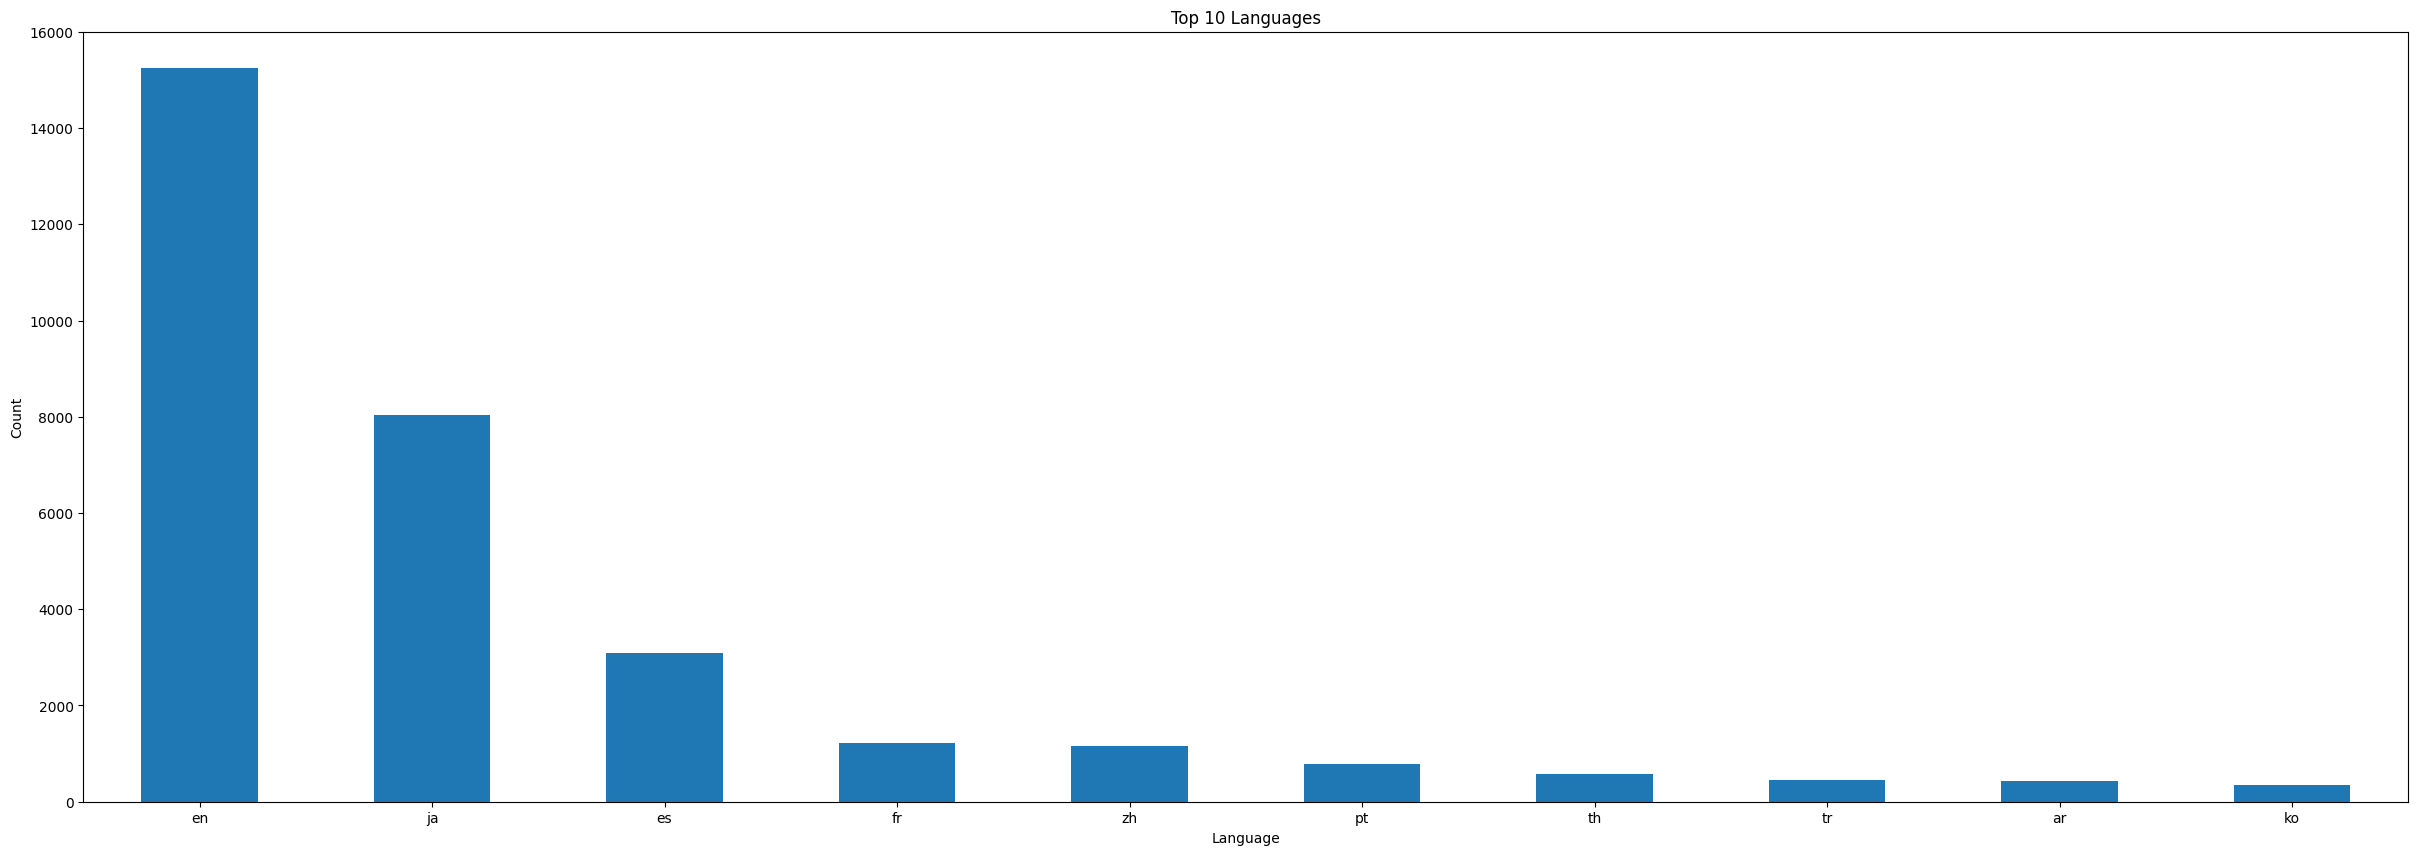

In [26]:
plt.figure(figsize=(30, 10))
top_10_lang.plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 10 Languages')
plt.xticks(rotation = 0)
plt.show()

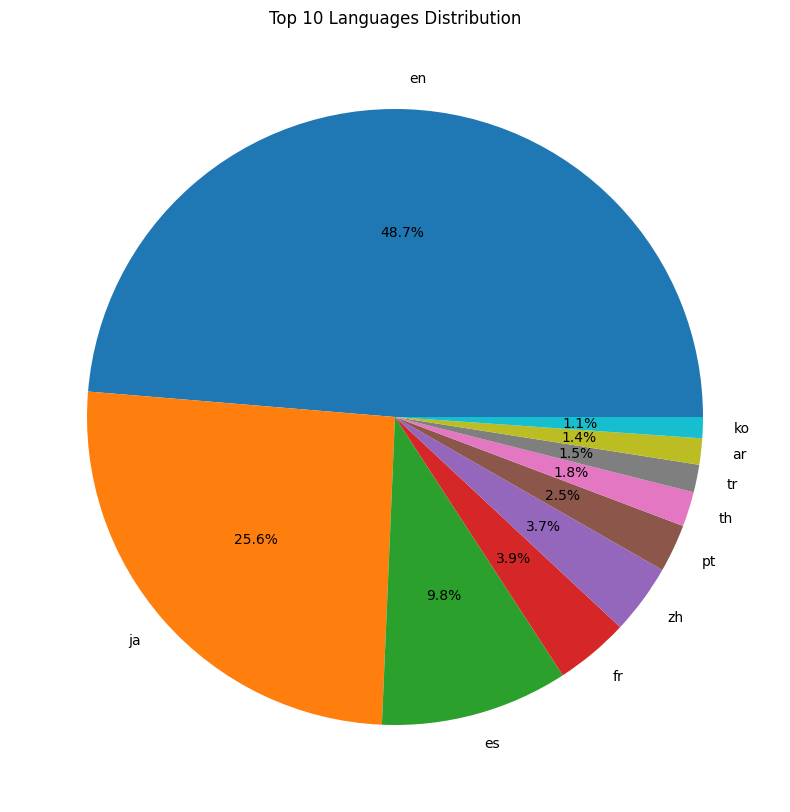

In [27]:
plt.figure(figsize=(30, 10))
plt.pie(top_10_lang.values, labels=top_10_lang.index, autopct='%1.1f%%')
plt.title('Top 10 Languages Distribution')
plt.show()

In [28]:
import plotly.express as px

In [29]:
top_10_df = pd.DataFrame({'Language': top_10_lang.index, 'Count': top_10_lang.values})

In [30]:
fig = px.bar(top_10_df, x='Language', y='Count', labels={'Language': 'Language', 'Count': 'Count'},
             title='Top 10 Languages')
fig.update_layout(xaxis_tickangle=0)
fig.show()

In [31]:
fig_pie = px.pie(top_10_df, values='Count', names='Language', title='Top 10 Languages Distribution')
fig_pie.show()

In [32]:
df['user_verified'].unique()

array([False, True], dtype=object)

In [33]:
df['user_verified'].value_counts()

False    31045
True      1950
Name: user_verified, dtype: int64

In [34]:
verified_counts = df['user_verified'].value_counts()

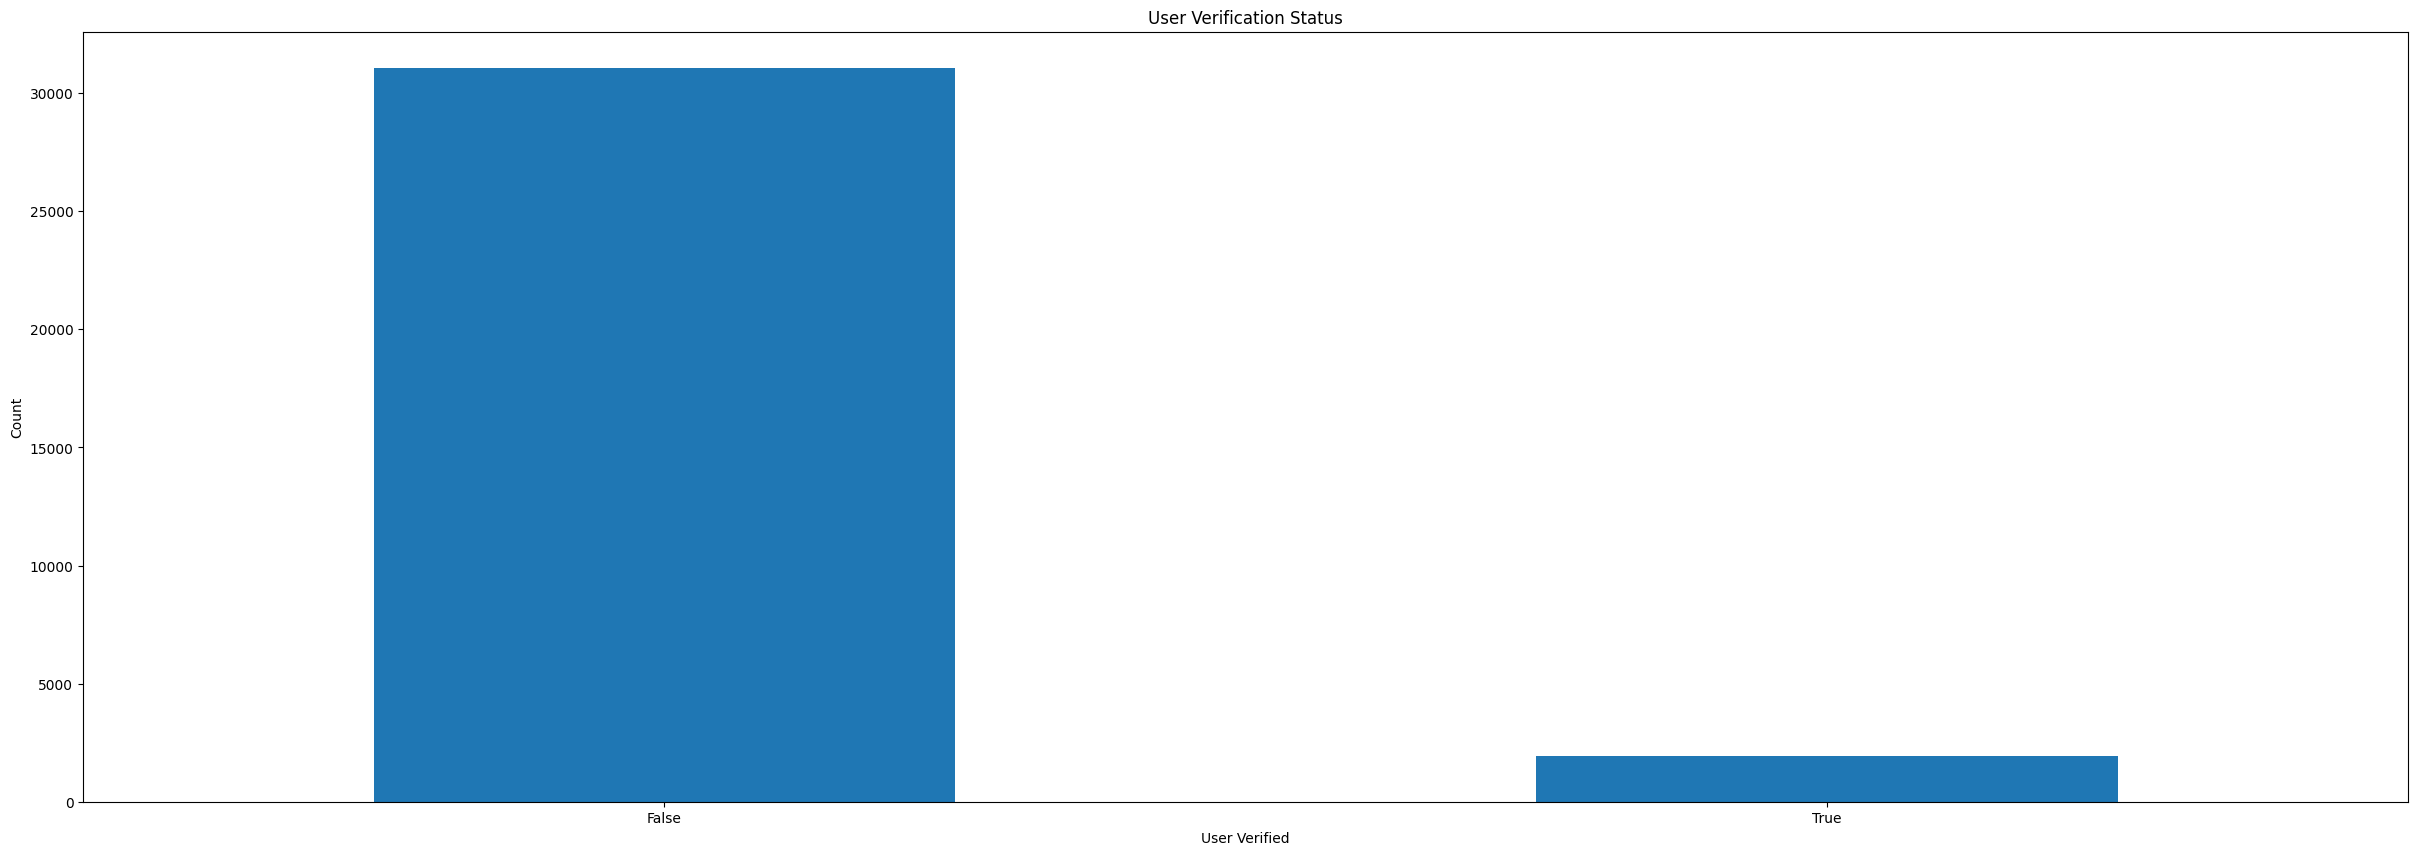

In [35]:
plt.figure(figsize=(30, 10))
verified_counts.plot(kind='bar')
plt.xlabel('User Verified')
plt.ylabel('Count')
plt.title('User Verification Status')
plt.xticks(rotation=0)
plt.show()

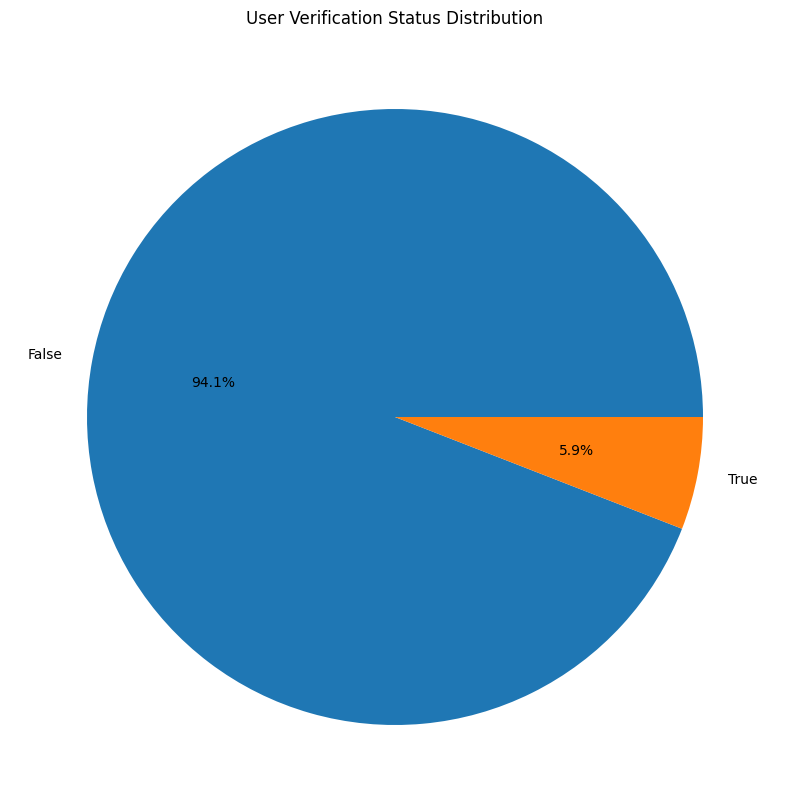

In [36]:
plt.figure(figsize=(30, 10))
plt.pie(verified_counts, labels=verified_counts.index, autopct='%1.1f%%')
plt.title('User Verification Status Distribution')
plt.show()

In [37]:
fig_count = px.bar(x=verified_counts.index, y=verified_counts.values, labels={'x': 'User Verified', 'y': 'Count'},
                   title='User Verification Status')
fig_count.show()

In [38]:
fig_pie = px.pie(values=verified_counts.values, names=verified_counts.index,
                 title='User Verification Status Distribution')
fig_pie.show()

## Text Preprocessing and Feature Engineering

In [39]:
import re
from tqdm.notebook import tqdm #to show downloading part
from datetime import datetime
import dateutil.parser #converts string objecttodatetime object

In [40]:
! pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.3 MB/s eta 0:00:00


In [41]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [42]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random

In [43]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
data = df.copy()
data['original_tweet'] = df['text']
data['datetime'] = data['tweet_created']
data['datetime'] = data.datetime.apply(lambda x: dateutil.parser.parse(x))
rt_mask = data.text.apply(lambda x: "RT @" in x)#masking the data if retweet is present as true and false

In [45]:
data.text = data.text.str.lower()
data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x))#removing mentions
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x))#removing hashtags
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x))#removing hyperlinks
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))#removing alphanumeric
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))#removing single character surrounded by whitespace
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))#removing consecutive whitespaces

In [46]:
data['datetime'] = pd.to_datetime(data['datetime']).dt.tz_localize(None)#emoving timezone

In [47]:
data.head(2)

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime
0,1.64E+18,2023-04-03 13:59:44+00:00,07:02.5,rt เทคน คฝ กภาษาก บ chatgpt ท ผมลอง ผมลองฝ ก อ...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,2023-04-03 13:59:44
1,1.64E+18,2023-04-03 10:59:22+00:00,06:59.4,chatgptをもっと活かせるchrome拡張機能4選,ja,2264288640,ミミズクりんゆ,DRVO_Project,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,2023-04-03 10:59:22


In [48]:
spell = SpellChecker()

In [49]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [50]:
data['words'] = data.text.apply(lambda x:re.findall(r'\w+', x ))
data['errors'] = data.words.apply(spell.unknown)
data['errors_count'] = data.errors.apply(len)
data['words_count'] = data.words.apply(len)
data['sentence_length'] = data.text.apply(len)
data['hour'] = data.datetime.apply(lambda x: x.hour)
data['date'] = data.datetime.apply(lambda x: x.date())
data['month'] = data.datetime.apply(lambda x: x.month)
data['year'] = data.datetime.apply(lambda x: x.year)

In [51]:
sia = SIA()

In [52]:
data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(data['text'])]
data['overall_sentiment'] = data['sentiment'].apply(label_sentiment);

  0%|          | 0/32995 [00:00<?, ?it/s]

In [53]:
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_created,user_followers_count,...,errors,errors_count,words_count,sentence_length,hour,date,month,year,sentiment,overall_sentiment
0,1.64E+18,2023-04-03 13:59:44+00:00,07:02.5,rt เทคน คฝ กภาษาก บ chatgpt ท ผมลอง ผมลองฝ ก อ...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,2016-01-04 02:27:33+00:00,1293.0,...,"{ญ, าพอใจคร, บ, ว, ใช, ท, น, อ, ธ, ยวก, อแค, เ...",27,33,119,13,2023-04-03,4,2023,0.0000,neutral
1,1.64E+18,2023-04-03 10:59:22+00:00,06:59.4,chatgptをもっと活かせるchrome拡張機能4選,ja,2264288640,ミミズクりんゆ,DRVO_Project,2013-12-27 12:39:07+00:00,7878.0,...,{chatgptをもっと活かせるchrome拡張機能4選},1,1,27,10,2023-04-03,4,2023,0.0000,neutral
2,1.64E+18,2023-04-03 03:59:28+00:00,06:52.5,rt chatgpt plugins are the fastest way to get ...,en,2383245894,pk,pradeep42329225,2014-03-11 06:04:10+00:00,269.0,...,"{2023ve, chatgpt, createdstep, rt, plugins}",5,22,113,3,2023-04-03,4,2023,0.5574,positive
3,1.64E+18,2023-04-03 15:59:59+00:00,07:04.7,get an intelligent chatbot for your website in...,en,1.63304E+18,AR Leyva,ArrheniusLey,2023-03-07 09:43:36+00:00,264.0,...,"{chatbase, itthat, uploaddocument, chatgpt, ch...",5,41,231,15,2023-04-03,4,2023,0.7096,positive
4,1.64E+18,2023-04-03 01:59:25+00:00,06:50.6,hey guys has launched at just 55 000 usd marke...,en,1.3114E+18,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,2020-09-30 20:32:00+00:00,447.0,...,"{4x, zsp, chatgpt, usd, marketcap, arb, defi}",7,34,176,1,2023-04-03,4,2023,-0.1531,negative


In [54]:
data['overall_sentiment'].value_counts()

neutral     23273
positive     5549
negative     4173
Name: overall_sentiment, dtype: int64

##Further Text pre-processing

In [55]:
df_new = data.copy()

In [56]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [57]:
df_new['text'] = df_new['text'].apply(lambda x: clean_text(x))

In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])#join is done to get new sentence
    return punctuationfree
df_new['text']= df_new['text'].apply(lambda x:remove_punctuation(x))

In [60]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [61]:
df_new['text']= df_new['text'].apply(lambda x: tokenization(x))

In [62]:
stopwords = nltk.corpus.stopwords.words('english')

In [63]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [64]:
df_new['text']= df_new['text'].apply(lambda x:remove_stopwords(x))

In [65]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [66]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [67]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [68]:
df_new['text']=df_new['text'].apply(lambda x:lemmatizer(x))

In [69]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [70]:
df_new['text'] = df_new['text'].apply(lambda x: clean_text(x))

In [71]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [72]:
df_new['text'] = df_new['text'].apply(lambda x: remove_urls(x))

In [73]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [74]:
df_new['text'] = df_new['text'].apply(lambda x: remove_digits(x))

In [75]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [76]:
df_new['text'] = df_new['text'].apply(lambda x: remove_emojis(x))

In [77]:
df_new['text'] = df_new['text'].apply(lambda x: re.sub(r'\brt\b', '', x))

In [78]:
df_new['text']

0         เทคน คฝ กภาษาก บ chatgpt ท ผมลอง ผมลองฝ ก อ ง...
1                                                         
2         chatgpt plugins are the fastest way to get ri...
3        get an intelligent chatbot for your website in...
4        hey guys has launched at just usd marketcap th...
                               ...                        
32997     affiliate marketers are making using chatgpt ...
32998     for halfcentury the godfather ofi nurtured th...
32999    محاضرة تدريبية بعنوان chatgpt and the downfall...
33000     we just gave the worldmost powerful ai access...
33001                     上线倒计时 系好安全带 让我们一起进入人工智能的未来吧 了解更多
Name: text, Length: 32995, dtype: object

In [79]:
en_data = df_new[df_new['lang'] == 'en']#only english df

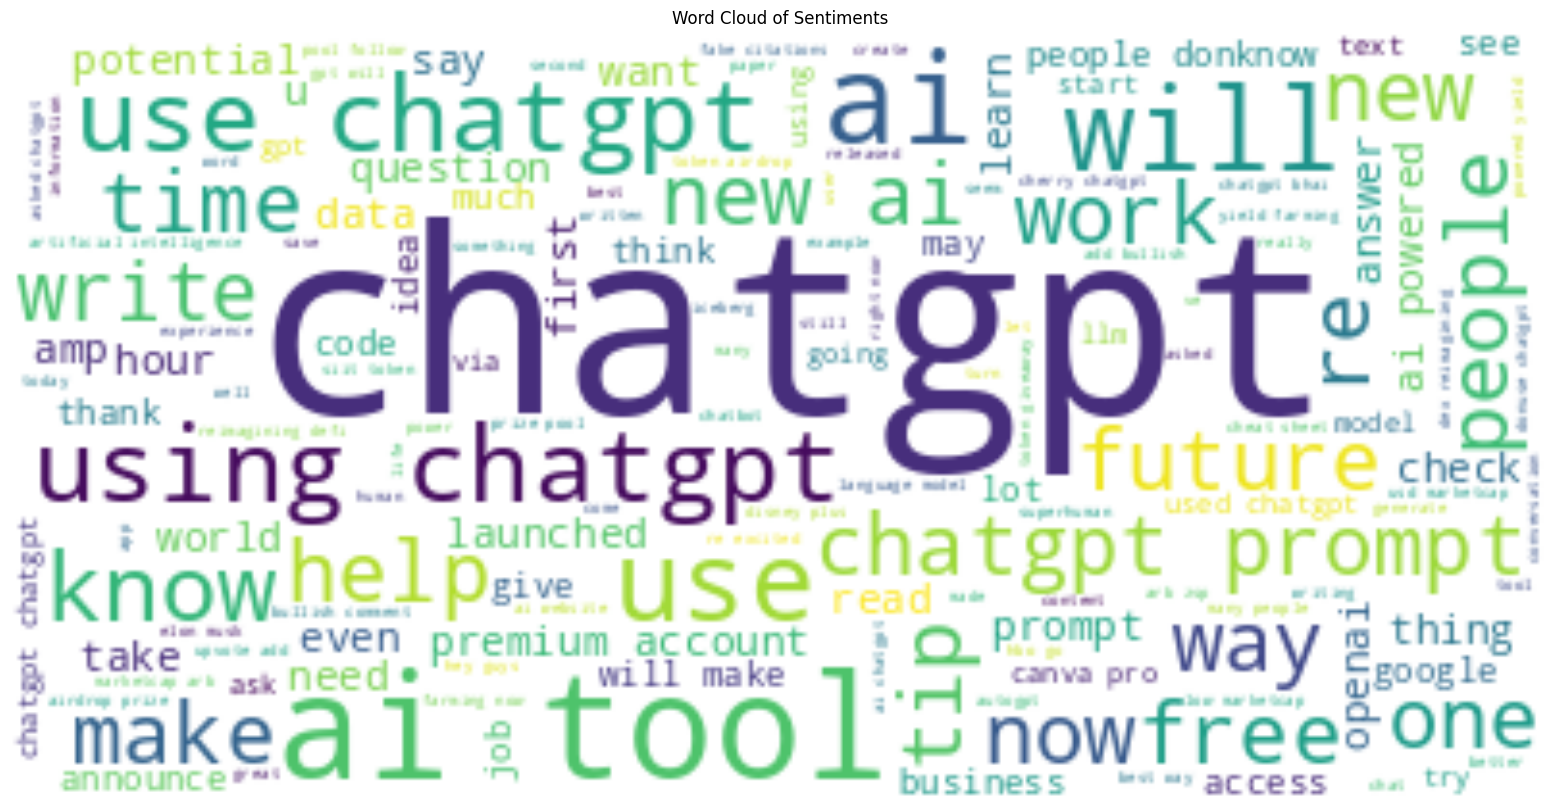

In [80]:
from wordcloud import WordCloud

# Concatenate all the text data into a single string
text_data = ' '.join(en_data['text'])

# Generate the word cloud
wordcloud = WordCloud(background_color='white').generate(text_data)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 10))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Set the plot title
ax.set_title('Word Cloud of Sentiments')

# Show the plot
plt.show()


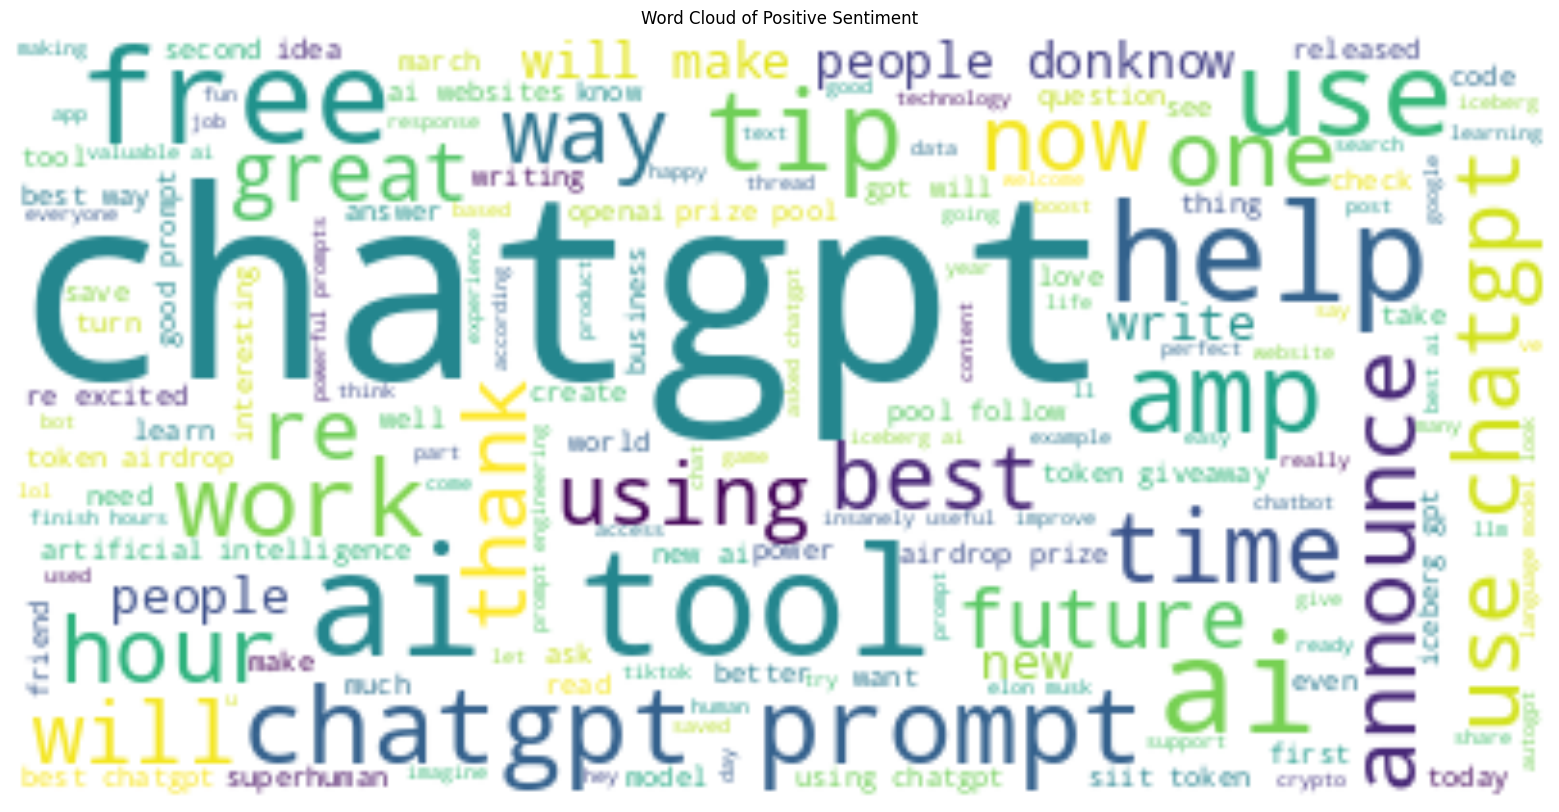

In [81]:
# Filter the text data for positive sentiment
positive_text_data = ' '.join(en_data[en_data['overall_sentiment'] == 'positive']['text'])

# Generate the word cloud for positive sentiment
wordcloud = WordCloud(background_color='white').generate(positive_text_data)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 10))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Set the plot title
ax.set_title('Word Cloud of Positive Sentiment')

# Show the plot
plt.show()

In [82]:
en_data.columns

Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_name', 'user_username', 'user_created',
       'user_followers_count', 'user_following_count', 'user_tweet_count',
       'user_verified', 'retweet_count', 'like_count', 'reply_count',
       'impression_count', 'original_tweet', 'datetime', 'words', 'errors',
       'errors_count', 'words_count', 'sentence_length', 'hour', 'date',
       'month', 'year', 'sentiment', 'overall_sentiment'],
      dtype='object')

In [83]:
df1 = en_data[['text', 'overall_sentiment']]

In [84]:
df1

,text,overall_sentiment
2,chatgpt plugins are the fastest way to get ri...,positive
3,get an intelligent chatbot for your website in...,positive
4,hey guys has launched at just usd marketcap th...,negative
5,now join dataland chatgpt tasks ①log in to lt...,neutral
9,the plagiarism detector will introduce its det...,positive
...,...,...
32994,ai is coming for our jobs check out this artic...,negative
32995,use for free on get chatgpt prodigy chrome ext...,neutral
32997,affiliate marketers are making using chatgpt ...,neutral
32998,for halfcentury the godfather ofi nurtured th...,positive


In [85]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [86]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [87]:
df1['text'] =  df1['text'].apply(lambda x: lemmatizer(x))

In [88]:
df1

,text,overall_sentiment
2,chatgpt plugin fast way rich createdstep ste...,positive
3,intelligent chatbot website minute chatbase ai...,positive
4,hey guy launch usd marketcap chatgpt dex reima...,negative
5,join dataland chatgpt task ①log lt ②try sins...,neutral
9,plagiarism detector introduce detection tool t...,positive
...,...,...
32994,ai come job check article software engineer pa...,negative
32995,use free chatgpt prodigy chrome extension hand...,neutral
32997,affiliate marketer make chatgpt people donkn...,neutral
32998,halfcentury godfather ofi nurture technology...,positive


In [89]:
df1 = df1.drop(index=5)

In [90]:
df1

,text,overall_sentiment
2,chatgpt plugin fast way rich createdstep ste...,positive
3,intelligent chatbot website minute chatbase ai...,positive
4,hey guy launch usd marketcap chatgpt dex reima...,negative
9,plagiarism detector introduce detection tool t...,positive
10,germany follow italyfootsteps block chatgpt da...,negative
...,...,...
32994,ai come job check article software engineer pa...,negative
32995,use free chatgpt prodigy chrome extension hand...,neutral
32997,affiliate marketer make chatgpt people donkn...,neutral
32998,halfcentury godfather ofi nurture technology...,positive


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['overall_sentiment'])

df1['overall_sentiment'] = le.transform(df1['overall_sentiment'])

In [92]:
df1

,text,overall_sentiment
2,chatgpt plugin fast way rich createdstep ste...,2
3,intelligent chatbot website minute chatbase ai...,2
4,hey guy launch usd marketcap chatgpt dex reima...,0
9,plagiarism detector introduce detection tool t...,2
10,germany follow italyfootsteps block chatgpt da...,0
...,...,...
32994,ai come job check article software engineer pa...,0
32995,use free chatgpt prodigy chrome extension hand...,1
32997,affiliate marketer make chatgpt people donkn...,1
32998,halfcentury godfather ofi nurture technology...,2


In [93]:
x = df1['text']
y = df1['overall_sentiment']

print(len(x), len(y))

15238 15238


## Model Building

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, stratify = df1['overall_sentiment'],
                                                    random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

11428 11428
3810 3810


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [96]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [97]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [98]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [99]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7934383202099737


In [100]:
#alternative method
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [101]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.773753280839895


In [102]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])

In [103]:
pipe.fit(x_train, y_train)
y_pred_class = pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.7863517060367454


In [104]:
import pickle

In [105]:
# Save the trained model and fitted CountVectorizer
model = {'nb': nb, 'vect': vect}
with open("nb_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [106]:
import joblib

In [107]:
model = {'nb': nb, 'vect': vect}
joblib.dump(model, "nb_model.joblib")

['nb_model.joblib']